# Object Detection Models

1.   R-CNN
2.   Fast R-CNN
3.   Faster R-CNN
4.   YOLO

# Metrics:
 iou -> intersection over union

 mAP -> Mean Average Precision

# Benchmark datasets:
MSCOCO

PASCAL VOC

# bounding box shapes - xyxy, xywh
 class labels

 class probabilities

In [1]:
import torch
from torchvision import transforms
from PIL import Image
import cv2
import numpy as np

# Load YOLO Model

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

/usr/local/lib/python3.10/dist-packages/torch/hub.py:293: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


requirements: Ultralytics requirements ['gitpython>=3.1.30', 'pillow>=10.3.0', 'requests>=2.32.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 102.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 178.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 155.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0

requirements: AutoUpdate success ✅ 11.4s, installed 3 packages: ['gitpython>=3.1.30', 'pillow>=10.3.0', 'requests>=2.32.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 2024-5-30 Python-3.10.12 torch-2.3.0+cu121 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 365MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Image Load

In [5]:
def load_image(image_path):
  img = cv2.imread(image_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (640, 540))
  return img


image_path = '/content/DSC_0423-01.jpeg'
img = load_image(image_path)

Run Inference

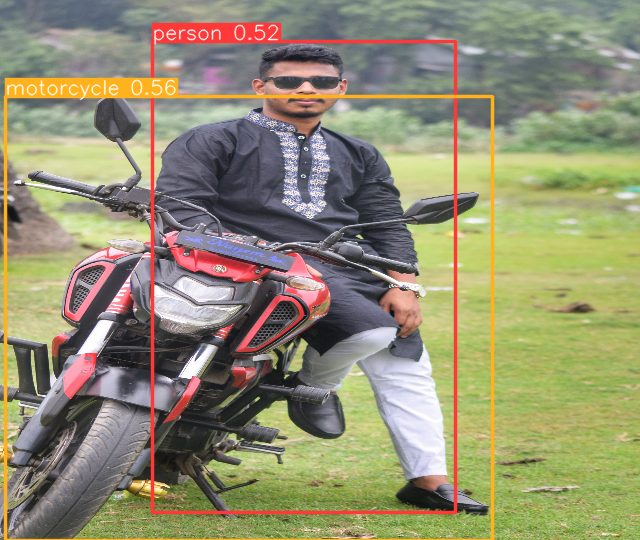

In [6]:
results = model(img)
results.show()

In [7]:
results

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 540x640 1 person, 1 motorcycle
Speed: 23.8ms pre-process, 1197.0ms inference, 34.4ms NMS per image at shape (1, 3, 544, 640)

In [8]:
labels, coords = results.xyxy[0][:, -1], results.xyxy[0][:, :-1]

for label, coord in zip(labels, coords):
  print(f'Label: {model.names[int(label)]}, Coordinates:{coord}')

Label: motorcycle, Coordinates:tensor([  5.20593,  96.98824, 492.64175, 540.00000,   0.55680])
Label: person, Coordinates:tensor([152.50629,  41.79517, 455.69952, 512.42163,   0.51748])


In [9]:
#get label names
model.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [10]:
# Object Detection Models
# R-CNN
# Fast R-CNN
# Faster R-CNN
# YOLO

# Metrics:
# iou -> intersection over union
# mAP -> Mean Average Precision

# Benchmark datasets:
# MSCOCO
# PASCAL VOC